# 🌳 Árbol de Decisión - Predicción de Medicamentos

**Objetivo:** Predecir qué medicamento es más adecuado para un paciente basándose en sus características médicas.

**Dataset:** Drugs A, B, C, X, Y for Decision Trees (Kaggle)

Este notebook te guiará paso a paso en la construcción de un modelo de Machine Learning usando Árboles de Decisión.

---

## 📚 ¿Qué es un Árbol de Decisión?

Un **Árbol de Decisión** es un algoritmo de aprendizaje supervisado que:
- Funciona como un diagrama de flujo de preguntas y respuestas
- Cada nodo interno representa una pregunta sobre una característica
- Cada rama representa la respuesta a esa pregunta
- Cada hoja representa una predicción final

**Ventajas:**
- ✅ Fácil de interpretar y visualizar
- ✅ No requiere normalización de datos
- ✅ Puede manejar datos numéricos y categóricos
- ✅ Las decisiones son transparentes

**Desventajas:**
- ⚠️ Puede sobreajustarse fácilmente (overfitting)
- ⚠️ Pequeños cambios en los datos pueden cambiar el árbol
- ⚠️ Puede crear árboles sesgados si las clases están desbalanceadas

---

## 1️⃣ Importación de Librerías

**¿Qué hacemos aquí?**
Importamos todas las herramientas necesarias para el análisis:
- **pandas/numpy:** Manipulación de datos
- **matplotlib/seaborn:** Visualización
- **sklearn:** Algoritmos de Machine Learning

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
import joblib

warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 6)

print('✅ Librerías cargadas exitosamente')


✅ Librerías cargadas exitosamente


---

## 2️⃣ Descarga y Carga del Dataset

**¿Qué hacemos aquí?**
Descargamos el dataset desde Kaggle y lo cargamos en un DataFrame de pandas.

**Sobre el dataset:**
- Contiene información de 200 pacientes
- Variables: Edad, Sexo, Presión Sanguínea, Colesterol, Sodio/Potasio en sangre
- **Objetivo:** Predecir qué medicamento (A, B, C, X, Y) es más apropiado

**Nota:** Asegúrate de tener tu archivo `kaggle.json` en el directorio del proyecto.

In [43]:
# Instalar kaggle si no está instalado
!pip install -q kaggle

# Configurar credenciales de Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargar dataset
!kaggle datasets download -d pablomgomez21/drugs-a-b-c-x-y-for-decision-trees -q

# Descomprimir
!unzip -q -o drugs-a-b-c-x-y-for-decision-trees.zip

# Cargar dataset
df = pd.read_csv('drug200.csv')

print(f'✅ Dataset cargado correctamente')
print(f'📊 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas\n')
print('Primeras 5 filas:')
df.head()


Dataset URL: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees
License(s): unknown
✅ Dataset cargado correctamente
📊 Dimensiones: 200 filas × 6 columnas

Primeras 5 filas:


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


---

## 3️⃣ Análisis Exploratorio de Datos (EDA)

**¿Qué hacemos aquí?**
Exploramos el dataset para entender su estructura, tipos de datos y distribución.

**¿Por qué es importante?**
- Detectar valores nulos o inconsistentes
- Entender las variables disponibles
- Identificar patrones iniciales en los datos

In [44]:
print('='*70)
print('INFORMACIÓN GENERAL DEL DATASET')
print('='*70)

# Información básica
print(f'\n📊 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas')
print(f'\n💾 Tipos de datos:')
print(df.dtypes)

# Valores nulos
print(f'\n🔍 Valores nulos:')
null_counts = df.isnull().sum()
if null_counts.sum() > 0:
    print(null_counts[null_counts > 0])
else:
    print('✅ No hay valores nulos')

# Estadísticas descriptivas
print(f'\n📈 Estadísticas de variables numéricas:')
print(df.describe())

# Variables categóricas
print(f'\n📋 Variables categóricas:')
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f'\n  {col}: {df[col].nunique()} valores únicos')
    print(df[col].value_counts())


INFORMACIÓN GENERAL DEL DATASET

📊 Dimensiones: 200 filas × 6 columnas

💾 Tipos de datos:
Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

🔍 Valores nulos:
✅ No hay valores nulos

📈 Estadísticas de variables numéricas:
              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

📋 Variables categóricas:

  Sex: 2 valores únicos
Sex
M    104
F     96
Name: count, dtype: int64

  BP: 3 valores únicos
BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

  Cholesterol: 2 valores únicos
Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

  Drug: 5 valores únicos
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


---

## 4️⃣ Preprocesamiento de Datos

**¿Qué hacemos aquí?**
Preparamos los datos para que el modelo pueda procesarlos correctamente.

**¿Por qué es necesario?**
- Los algoritmos de sklearn solo trabajan con números
- Debemos convertir variables categóricas (texto) a números
- Usamos **LabelEncoder** para esta transformación

**¿Qué es LabelEncoder?**
Convierte cada valor único de una variable categórica en un número:
- Ejemplo: ['Male', 'Female'] → [0, 1]

In [45]:
df_processed = df.copy()

# Identificar variable objetivo
TARGET = df_processed.columns[-1]
print(f'🎯 Variable objetivo: {TARGET}')
print(f'\n📊 Distribución de clases:')
print(df_processed[TARGET].value_counts())

# Codificación de variables categóricas
label_encoders = {}
categorical_features = [col for col in df_processed.select_dtypes(include=['object']).columns 
                        if col != TARGET]

print(f'\n🔄 Codificando {len(categorical_features)} variables categóricas:')
for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le
    print(f'  ✓ {col}: {list(le.classes_)}')

# Codificar variable objetivo
le_target = LabelEncoder()
df_processed[TARGET] = le_target.fit_transform(df_processed[TARGET].astype(str))
label_encoders[TARGET] = le_target
print(f'  ✓ {TARGET} (objetivo): {list(le_target.classes_)}')
print('\n✅ Preprocesamiento completado')


🎯 Variable objetivo: Drug

📊 Distribución de clases:
Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

🔄 Codificando 3 variables categóricas:
  ✓ Sex: ['F', 'M']
  ✓ BP: ['HIGH', 'LOW', 'NORMAL']
  ✓ Cholesterol: ['HIGH', 'NORMAL']
  ✓ Drug (objetivo): ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

✅ Preprocesamiento completado


---

## 5️⃣ División del Dataset

**¿Qué hacemos aquí?**
Dividimos los datos en dos conjuntos:
- **Entrenamiento (80%):** Para que el modelo aprenda
- **Prueba (20%):** Para evaluar qué tan bien funciona

**¿Por qué es importante?**
- Si evaluamos con los mismos datos de entrenamiento, el resultado sería engañoso
- El modelo debe probarse con datos que nunca ha visto
- Usamos **stratify** para mantener la proporción de clases en ambos conjuntos

In [46]:
# Separar features y target
X = df_processed.drop(columns=[TARGET])
y = df_processed[TARGET]

# División train/test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('📊 DIVISIÓN DEL DATASET')
print(f'\n  • Conjunto de Entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.0f}%)')
print(f'  • Conjunto de Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.0f}%)')
print(f'  • Total de Features: {X.shape[1]}')


📊 DIVISIÓN DEL DATASET

  • Conjunto de Entrenamiento: 160 muestras (80%)
  • Conjunto de Prueba: 40 muestras (20%)
  • Total de Features: 5


---

## 6️⃣ Modelo Base (Baseline)

**¿Qué hacemos aquí?**
Creamos un modelo de Árbol de Decisión con parámetros por defecto.

**¿Por qué un modelo base?**
- Nos da un punto de referencia inicial
- Podemos ver el rendimiento sin optimización
- Después lo compararemos con el modelo optimizado

**Parámetros por defecto:**
- Sin límite de profundidad (el árbol crece libremente)
- Criterio: Gini (mide la impureza de las divisiones)
- ⚠️ Puede sufrir de overfitting (se ajusta demasiado a los datos de entrenamiento)

In [47]:
# Entrenar modelo base
dt_base = DecisionTreeClassifier(random_state=42)
dt_base.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred_base = dt_base.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)

print('🌳 MODELO BASE - RESULTADOS')
print(f'\n  • Criterio: gini')
print(f'  • Max depth: Sin límite')
print(f'  • Profundidad del árbol: {dt_base.get_depth()}')
print(f'  • Número de hojas: {dt_base.get_n_leaves()}')
print(f'  • Accuracy: {accuracy_base:.4f} ({accuracy_base*100:.2f}%)')

# Evaluar si necesita optimización
if accuracy_base >= 0.95:
    print(f'\n💡 NOTA: El modelo base ya tiene un excelente rendimiento (≥95%)')
    print(f'   La optimización puede no mostrar mejoras significativas.')
    print(f'   Sin embargo, continuaremos con el proceso para fines didácticos.')
elif accuracy_base >= 0.85:
    print(f'\n⚠️  El modelo tiene buen rendimiento, pero puede mejorarse.')
else:
    print(f'\n🔧 El modelo necesita optimización para mejorar su rendimiento.')


🌳 MODELO BASE - RESULTADOS

  • Criterio: gini
  • Max depth: Sin límite
  • Profundidad del árbol: 4
  • Número de hojas: 6
  • Accuracy: 0.9750 (97.50%)

💡 NOTA: El modelo base ya tiene un excelente rendimiento (≥95%)
   La optimización puede no mostrar mejoras significativas.
   Sin embargo, continuaremos con el proceso para fines didácticos.


---

## 7️⃣ Optimización de Hiperparámetros (Grid Search)

**¿Qué hacemos aquí?**
Buscamos la mejor combinación de parámetros para nuestro árbol.

**¿Qué es Grid Search?**
- Prueba sistemáticamente todas las combinaciones posibles de parámetros
- Utiliza validación cruzada (5-fold) para evaluar cada combinación
- Selecciona automáticamente la mejor combinación

**Hiperparámetros que optimizamos:**
- **max_depth:** Profundidad máxima del árbol (controla overfitting)
- **min_samples_split:** Mínimo de muestras para dividir un nodo
- **min_samples_leaf:** Mínimo de muestras en cada hoja
- **criterion:** Función para medir la calidad de las divisiones (gini o entropy)

**⚠️ Nota:** Si el modelo base ya tiene >95% de accuracy, es posible que no veamos mejoras significativas.
Esto es normal y demuestra que el modelo base ya captura bien los patrones de los datos.

In [48]:
# Definir el espacio de búsqueda
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

total_combinaciones = np.prod([len(v) for v in param_grid.values()])
print(f'🔍 BÚSQUEDA DE HIPERPARÁMETROS')
print(f'\n  • Espacio de búsqueda: {total_combinaciones} combinaciones')
print(f'  • Validación cruzada: 5-fold')
print(f'\n⏳ Buscando mejores parámetros...\n')

# Grid Search con validación cruzada
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print('\n✅ Búsqueda completada')


🔍 BÚSQUEDA DE HIPERPARÁMETROS

  • Espacio de búsqueda: 192 combinaciones
  • Validación cruzada: 5-fold

⏳ Buscando mejores parámetros...

Fitting 5 folds for each of 192 candidates, totalling 960 fits

✅ Búsqueda completada


In [49]:
# Mostrar mejores parámetros
print(f'\n🏆 MEJORES PARÁMETROS ENCONTRADOS:')
for param, value in grid_search.best_params_.items():
    print(f'  • {param}: {value}')

# Evaluar el mejor modelo
y_pred_best = grid_search.predict(X_test)
acc_opt = accuracy_score(y_test, y_pred_best)

print(f'\n📊 RESULTADOS:')
print(f'  • Score Validación Cruzada: {grid_search.best_score_:.4f}')
print(f'  • Accuracy en Prueba: {acc_opt:.4f} ({acc_opt*100:.2f}%)')



🏆 MEJORES PARÁMETROS ENCONTRADOS:
  • criterion: gini
  • max_depth: 5
  • min_samples_leaf: 1
  • min_samples_split: 2

📊 RESULTADOS:
  • Score Validación Cruzada: 0.9938
  • Accuracy en Prueba: 0.9750 (97.50%)


---

## 8️⃣ Validación Cruzada

**¿Qué hacemos aquí?**
Evaluamos el modelo optimizado usando validación cruzada.

**¿Qué es Validación Cruzada (Cross-Validation)?**
- Divide los datos de entrenamiento en 5 partes (folds)
- Entrena el modelo 5 veces, cada vez usando 4 partes para entrenar y 1 para validar
- Nos da una estimación más robusta del rendimiento del modelo
- Reduce el riesgo de que el resultado dependa de una división particular de los datos

In [50]:
dt_optimizado = grid_search.best_estimator_

# Realizar validación cruzada
cv_scores = cross_val_score(dt_optimizado, X_train, y_train, cv=5, scoring='accuracy')

print('✅ VALIDACIÓN CRUZADA (5-fold)')
print(f'\n  • Scores por fold:')
for i, score in enumerate(cv_scores, 1):
    print(f'    Fold {i}: {score:.4f}')

print(f'\n  • Promedio: {cv_scores.mean():.4f}')
print(f'  • Desviación estándar: {cv_scores.std():.4f}')
print(f'  • Rango: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]')


✅ VALIDACIÓN CRUZADA (5-fold)

  • Scores por fold:
    Fold 1: 0.9688
    Fold 2: 1.0000
    Fold 3: 1.0000
    Fold 4: 1.0000
    Fold 5: 1.0000

  • Promedio: 0.9938
  • Desviación estándar: 0.0125
  • Rango: [0.9688, 1.0000]


---

## 9️⃣ Evaluación Detallada del Modelo

**¿Qué hacemos aquí?**
Evaluamos el modelo optimizado con múltiples métricas.

**Métricas que usamos:**
- **Accuracy:** Porcentaje de predicciones correctas
- **Precision:** De las predicciones positivas, cuántas son correctas
- **Recall:** De los casos positivos reales, cuántos detectamos
- **F1-Score:** Balance entre precisión y recall

**¿Por qué múltiples métricas?**
- Accuracy puede ser engañosa con clases desbalanceadas
- Diferentes métricas nos dan una visión más completa del rendimiento

In [51]:
# Predecir en conjunto de prueba
y_pred_opt = dt_optimizado.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_opt)
precision = precision_score(y_test, y_pred_opt, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_opt, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_opt, average='weighted', zero_division=0)

print('📈 MÉTRICAS DEL MODELO OPTIMIZADO')
print(f'\n  • Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)')
print(f'  • Precision: {precision:.4f}')
print(f'  • Recall:    {recall:.4f}')
print(f'  • F1-Score:  {f1:.4f}')

print(f'\n📋 Reporte de Clasificación por Clase:')
print(classification_report(y_test, y_pred_opt, target_names=label_encoders[TARGET].classes_))


📈 MÉTRICAS DEL MODELO OPTIMIZADO

  • Accuracy:  0.9750 (97.50%)
  • Precision: 0.9792
  • Recall:    0.9750
  • F1-Score:  0.9736

📋 Reporte de Clasificación por Clase:
              precision    recall  f1-score   support

       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        18

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40



---

## 🔟 Matriz de Confusión

**¿Qué hacemos aquí?**
Visualizamos los errores de clasificación del modelo.

**¿Qué es una Matriz de Confusión?**
- Muestra las predicciones correctas e incorrectas por clase
- Diagonal: predicciones correctas
- Fuera de la diagonal: errores
- Nos ayuda a identificar qué clases confunde el modelo

✅ Matriz guardada como matriz_confusion.png


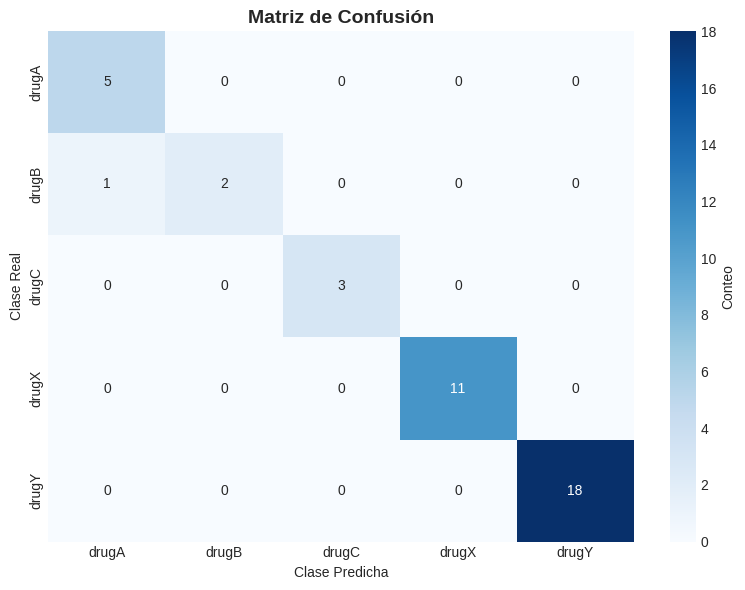

In [52]:
# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_opt)
class_names_list = list(label_encoders[TARGET].classes_)

# Visualizar
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names_list,
            yticklabels=class_names_list,
            cbar_kws={'label': 'Conteo'})
plt.title('Matriz de Confusión', fontsize=14, fontweight='bold')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.savefig('matriz_confusion.png', dpi=300, bbox_inches='tight')
print('✅ Matriz guardada como matriz_confusion.png')
plt.show()


---

## 1️⃣1️⃣ Visualización del Árbol de Decisión

**¿Qué hacemos aquí?**
Visualizamos gráficamente cómo el árbol toma decisiones.

**¿Cómo leer el árbol?**
- Cada cuadro representa un nodo (pregunta o decisión)
- Los colores representan las clases predichas
- Las ramas muestran el camino de decisión
- Solo mostramos los primeros 4 niveles para mejor legibilidad

✅ Árbol guardado como arbol_decision.png


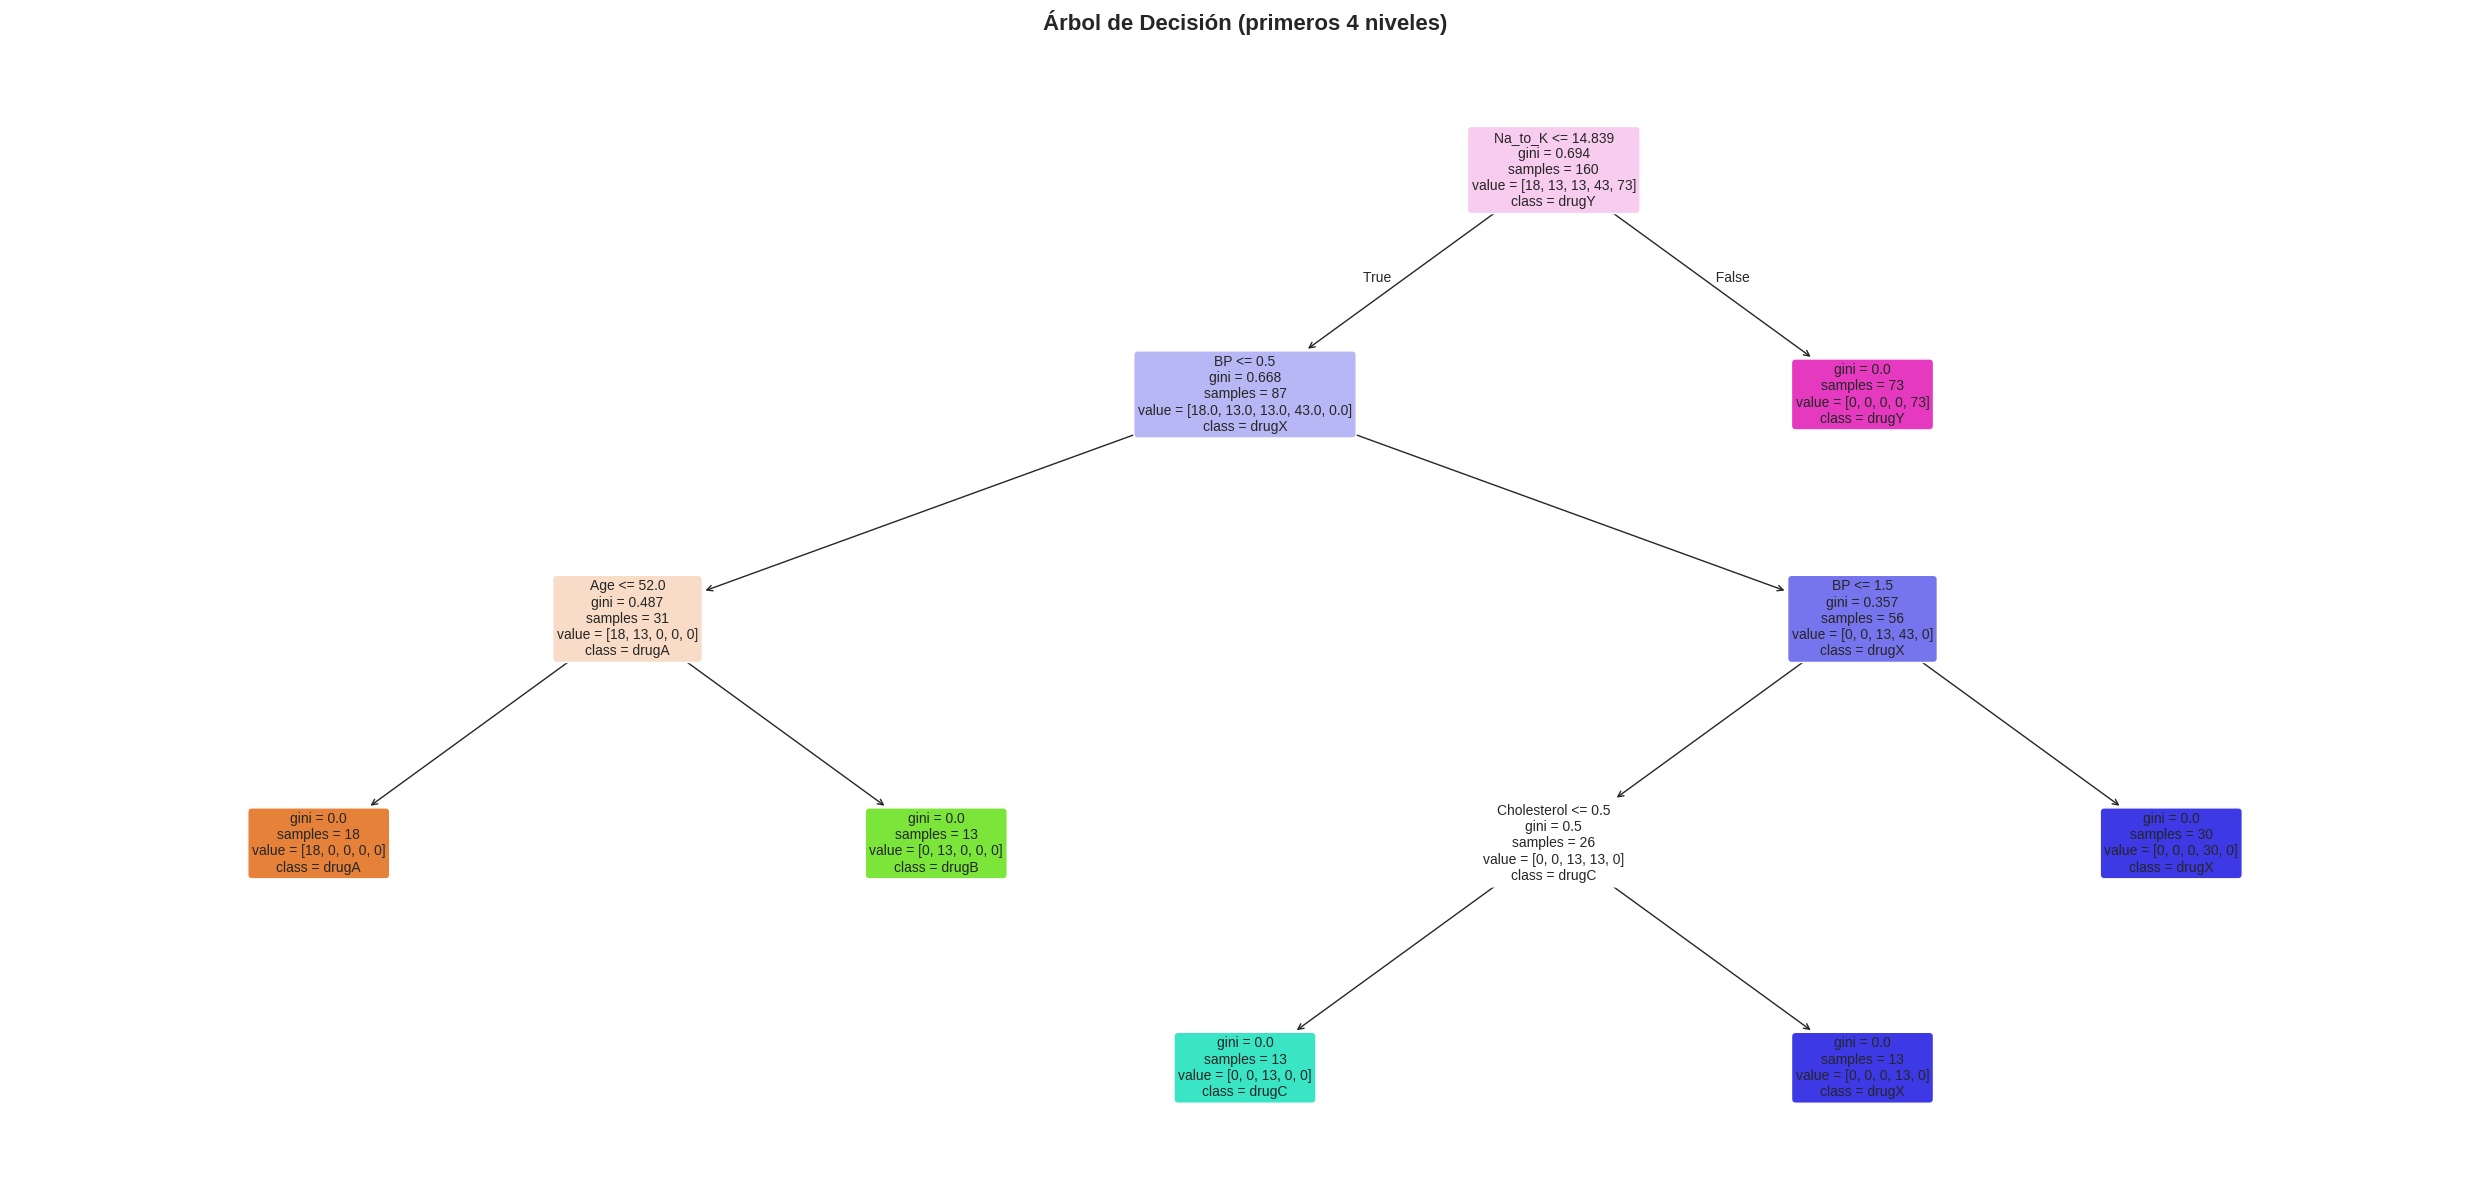

In [53]:
# Obtener nombres para la visualización
feature_names_list = X_train.columns.tolist()

plt.figure(figsize=(25, 12))
plot_tree(
    dt_optimizado,
    feature_names=feature_names_list,
    class_names=class_names_list,
    filled=True,
    rounded=True,
    fontsize=10,
    max_depth=4
)
plt.title('Árbol de Decisión (primeros 4 niveles)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('arbol_decision.png', dpi=300, bbox_inches='tight')
print('✅ Árbol guardado como arbol_decision.png')
plt.show()


---

## 1️⃣2️⃣ Importancia de Features

**¿Qué hacemos aquí?**
Identificamos qué características son más importantes para el modelo.

**¿Qué significa la importancia?**
- Valores entre 0 y 1
- Mayor valor = más importante para las predicciones
- La suma de todas las importancias = 1
- Nos ayuda a entender qué factores influyen más en las decisiones

📊 RANKING DE IMPORTANCIA:
  1. Na_to_K: 0.4762
  2. BP: 0.2706
  3. Age: 0.1360
  4. Cholesterol: 0.1171
  5. Sex: 0.0000

✅ Gráfico guardado como importancia_features.png


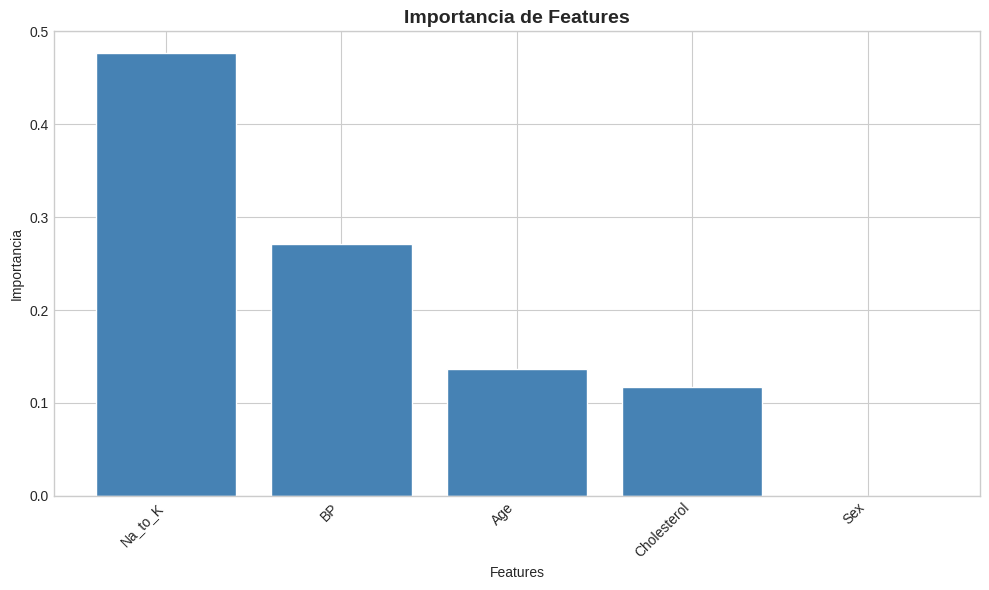

In [54]:
# Calcular y mostrar importancia
importances = dt_optimizado.feature_importances_
indices = np.argsort(importances)[::-1]

print('📊 RANKING DE IMPORTANCIA:')
for i in range(len(feature_names_list)):
    print(f'  {i+1}. {feature_names_list[indices[i]]}: {importances[indices[i]]:.4f}')

# Visualizar
plt.figure(figsize=(10, 6))
plt.title('Importancia de Features', fontsize=14, fontweight='bold')
plt.bar(range(len(importances)), importances[indices], color='steelblue')
plt.xticks(range(len(importances)), [feature_names_list[i] for i in indices], rotation=45, ha='right')
plt.ylabel('Importancia')
plt.xlabel('Features')
plt.tight_layout()
plt.savefig('importancia_features.png', dpi=300, bbox_inches='tight')
print('\n✅ Gráfico guardado como importancia_features.png')
plt.show()


---

## 1️⃣3️⃣ Comparación: Modelo Base vs Optimizado

**¿Qué hacemos aquí?**
Comparamos el rendimiento del modelo base con el optimizado.

**¿Por qué es importante?**
- Nos muestra si la optimización valió la pena
- Podemos ver cuánto mejoramos con Grid Search
- Justifica el tiempo invertido en la optimización

📊 COMPARACIÓN DE MODELOS

  • Modelo Base:       0.9750 (97.50%)
  • Modelo Optimizado: 0.9750 (97.50%)
  • Mejora:            Sin cambio significativo

💡 Ambos modelos tienen rendimiento similar.
   El modelo base ya captura bien los patrones de los datos.

✅ Comparación guardada como comparacion_modelos.png


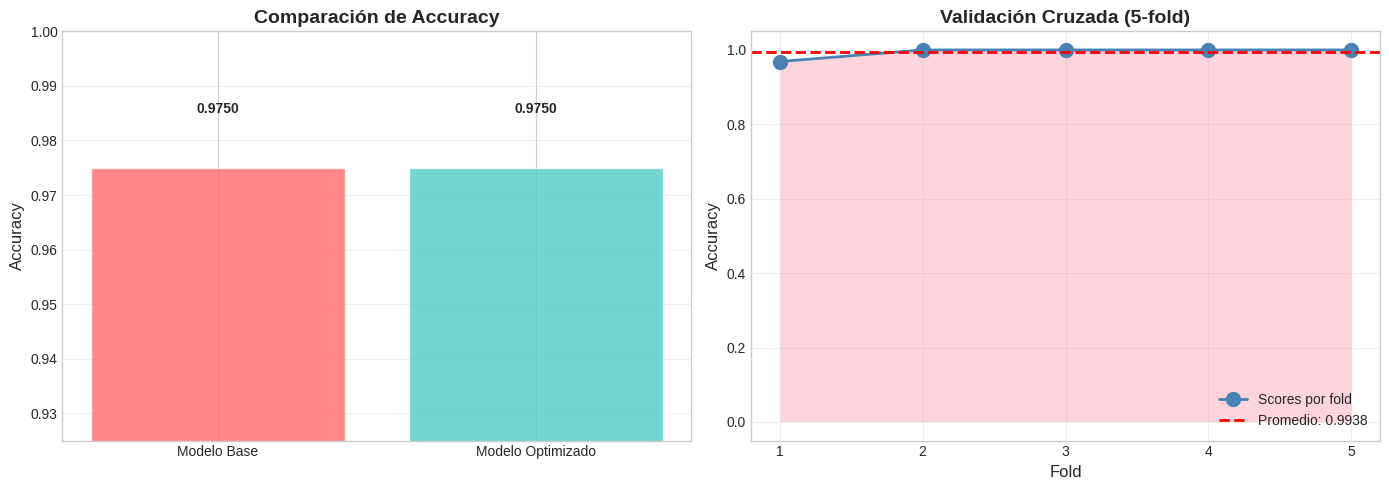

In [55]:
# Mostrar comparación numérica
print('📊 COMPARACIÓN DE MODELOS')
print(f'\n  • Modelo Base:       {accuracy_base:.4f} ({accuracy_base*100:.2f}%)')
print(f'  • Modelo Optimizado: {accuracy:.4f} ({accuracy*100:.2f}%)')
mejora_absoluta = accuracy - accuracy_base
mejora_relativa = (mejora_absoluta / accuracy_base) * 100 if accuracy_base > 0 else 0

if mejora_absoluta > 0.001:
    print(f'  • Mejora:            +{mejora_absoluta:.4f} ({mejora_relativa:.1f}%)')
elif mejora_absoluta < -0.001:
    print(f'  • Cambio:            {mejora_absoluta:.4f} ({mejora_relativa:.1f}%)')
    print(f'\n💡 El modelo optimizado tiene ligeramente menor accuracy.')
    print(f'   Esto puede deberse a que la regularización previene overfitting.')
else:
    print(f'  • Mejora:            Sin cambio significativo')
    print(f'\n💡 Ambos modelos tienen rendimiento similar.')
    print(f'   El modelo base ya captura bien los patrones de los datos.')

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras comparativo
modelos = ['Modelo Base', 'Modelo Optimizado']
accuracies = [accuracy_base, accuracy]
colors = ['#FF6B6B', '#4ECDC4']
axes[0].bar(modelos, accuracies, color=colors, alpha=0.8)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_ylim([min(accuracies) - 0.05, 1.0])
axes[0].set_title('Comparación de Accuracy', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for i, (modelo, acc) in enumerate(zip(modelos, accuracies)):
    axes[0].text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontweight='bold')

# Validación cruzada
axes[1].plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linewidth=2,
             markersize=10, color='steelblue', label='Scores por fold')
axes[1].axhline(y=cv_scores.mean(), color='red', linestyle='--', linewidth=2,
                label=f'Promedio: {cv_scores.mean():.4f}')
axes[1].fill_between(range(1, len(cv_scores) + 1), cv_scores, alpha=0.3)
axes[1].set_xlabel('Fold', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Validación Cruzada (5-fold)', fontsize=14, fontweight='bold')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, len(cv_scores) + 1))

plt.tight_layout()
plt.savefig('comparacion_modelos.png', dpi=300, bbox_inches='tight')
print('\n✅ Comparación guardada como comparacion_modelos.png')
plt.show()


---

## 1️⃣4️⃣ Reglas del Árbol (Interpretabilidad)

**¿Qué hacemos aquí?**
Exportamos las reglas de decisión del árbol en formato texto.

**¿Por qué es importante?**
- Podemos ver exactamente cómo el modelo toma decisiones
- Es útil para explicar el modelo a no expertos
- Permite auditar y validar la lógica del modelo
- Las reglas pueden implementarse en otros sistemas

In [56]:
# Exportar reglas del árbol
tree_rules = export_text(dt_optimizado, feature_names=feature_names_list)

print('📜 REGLAS DEL ÁRBOL DE DECISIÓN')
print('='*70)
print('\nEstas son las reglas que el modelo usa para tomar decisiones:\n')
print(tree_rules)

# Guardar en archivo
with open('arbol_reglas.txt', 'w', encoding='utf-8') as f:
    f.write('REGLAS DEL ÁRBOL DE DECISIÓN\n')
    f.write('='*70 + '\n\n')
    f.write(tree_rules)

print('\n✅ Reglas guardadas en arbol_reglas.txt')


📜 REGLAS DEL ÁRBOL DE DECISIÓN

Estas son las reglas que el modelo usa para tomar decisiones:

|--- Na_to_K <= 14.84
|   |--- BP <= 0.50
|   |   |--- Age <= 52.00
|   |   |   |--- class: 0
|   |   |--- Age >  52.00
|   |   |   |--- class: 1
|   |--- BP >  0.50
|   |   |--- BP <= 1.50
|   |   |   |--- Cholesterol <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- Cholesterol >  0.50
|   |   |   |   |--- class: 3
|   |   |--- BP >  1.50
|   |   |   |--- class: 3
|--- Na_to_K >  14.84
|   |--- class: 4


✅ Reglas guardadas en arbol_reglas.txt


---

## 1️⃣5️⃣ Guardar el Modelo

**¿Qué hacemos aquí?**
Guardamos el modelo entrenado y los encoders para uso futuro.

**¿Por qué guardar el modelo?**
- Podemos reutilizarlo sin tener que entrenar nuevamente
- Ahorra tiempo y recursos computacionales
- Permite deployar el modelo en producción
- Los encoders son necesarios para transformar nuevos datos de la misma manera

In [57]:
# Guardar modelo y encoders
import os

# Obtener directorio actual
current_dir = os.getcwd()

joblib.dump(dt_optimizado, 'decision_tree_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print('💾 MODELO GUARDADO EXITOSAMENTE')
print(f'\n  • decision_tree_model.pkl - Modelo entrenado')
print(f'  • label_encoders.pkl - Encoders para preprocesamiento')

print(f'\n📁 Ubicación de los archivos:')
print(f'  {current_dir}')

print('\n📝 Para cargar el modelo en el futuro:')
print('   modelo = joblib.load("decision_tree_model.pkl")')
print('   encoders = joblib.load("label_encoders.pkl")')


💾 MODELO GUARDADO EXITOSAMENTE

  • decision_tree_model.pkl - Modelo entrenado
  • label_encoders.pkl - Encoders para preprocesamiento

📁 Ubicación de los archivos:
  /content

📝 Para cargar el modelo en el futuro:
   modelo = joblib.load("decision_tree_model.pkl")
   encoders = joblib.load("label_encoders.pkl")


---

## 1️⃣6️⃣ Resumen Final

**¿Qué logramos?**
Un resumen completo del análisis y los resultados obtenidos.

Este es el resultado final de nuestro trabajo con árboles de decisión aplicado a la predicción de medicamentos.

In [58]:
import os

print('\n' + '='*70)
print('📋 RESUMEN FINAL DEL PROYECTO')
print('='*70)

print('\n🎯 MEJORES HIPERPARÁMETROS:')
for param, value in grid_search.best_params_.items():
    print(f'  • {param}: {value}')

print('\n📊 RENDIMIENTO DEL MODELO:')
print(f'  • Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)')
print(f'  • Precision: {precision:.4f}')
print(f'  • Recall:    {recall:.4f}')
print(f'  • F1-Score:  {f1:.4f}')

print('\n✅ VALIDACIÓN CRUZADA:')
print(f'  • Promedio:  {cv_scores.mean():.4f}')
print(f'  • Std Dev:   {cv_scores.std():.4f}')
print(f'  • Rango:     [{cv_scores.min():.4f}, {cv_scores.max():.4f}]')

print('\n💡 ANÁLISIS DE MEJORA:')
mejora = accuracy - accuracy_base
if mejora > 0.001:
    print(f'  • El modelo optimizado mejoró en {mejora:.4f} ({mejora/accuracy_base*100:.2f}%)')
elif mejora < -0.001:
    print(f'  • El modelo optimizado regulariza mejor (previene overfitting)')
else:
    print(f'  • El modelo base ya tenía un rendimiento óptimo')
    print(f'  • La optimización confirma que los parámetros por defecto son adecuados')

print('\n💾 ARCHIVOS GENERADOS:')
archivos = [
    'decision_tree_model.pkl',
    'label_encoders.pkl',
    'arbol_decision.png',
    'importancia_features.png',
    'matriz_confusion.png',
    'comparacion_modelos.png',
    'arbol_reglas.txt'
]
for archivo in archivos:
    print(f'  ✓ {archivo}')

print(f'\n📁 Ubicación de los archivos:')
print(f'  {os.getcwd()}')

print('\n🎉 ¡ANÁLISIS COMPLETADO EXITOSAMENTE!')
print('='*70)


📋 RESUMEN FINAL DEL PROYECTO

🎯 MEJORES HIPERPARÁMETROS:
  • criterion: gini
  • max_depth: 5
  • min_samples_leaf: 1
  • min_samples_split: 2

📊 RENDIMIENTO DEL MODELO:
  • Accuracy:  0.9750 (97.50%)
  • Precision: 0.9792
  • Recall:    0.9750
  • F1-Score:  0.9736

✅ VALIDACIÓN CRUZADA:
  • Promedio:  0.9938
  • Std Dev:   0.0125
  • Rango:     [0.9688, 1.0000]

💡 ANÁLISIS DE MEJORA:
  • El modelo base ya tenía un rendimiento óptimo
  • La optimización confirma que los parámetros por defecto son adecuados

💾 ARCHIVOS GENERADOS:
  ✓ decision_tree_model.pkl
  ✓ label_encoders.pkl
  ✓ arbol_decision.png
  ✓ importancia_features.png
  ✓ matriz_confusion.png
  ✓ comparacion_modelos.png
  ✓ arbol_reglas.txt

📁 Ubicación de los archivos:
  /content

🎉 ¡ANÁLISIS COMPLETADO EXITOSAMENTE!
